**Avani Goyal, Nathaniel Dirks** :
12752 :
Final Project
Due: 12/13/2015

In [171]:
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from operator import itemgetter
import math
%matplotlib inline

### Load the RECS dataset into the memory. 

It is loaded in two different variables to use it for two different purposes.
1. datanames: It stores RECS dataset along with the column names in tuple format
2. data1: It stores the data into a structured array format to be used for running iterations across all columns

In [172]:
f= open('recs2009_public.csv','r')
datanames = np.genfromtxt(f,delimiter=',', names=True,dtype=None)

In [173]:
data1 = np.genfromtxt('recs2009_public.csv',delimiter=',', skip_header=1)

### Preliminary analysis of dataset

The dataset is categorized for different regions such as 'midatlantic' (regional division - #2) and 'westsouthcentral' (regional division - #7)

In [174]:
midatlantic = datanames[np.where(datanames['DIVISION']==2)]
# print midatlantic[0]
print midatlantic.shape

(1328,)


In [175]:
wesouthcen = datanames[np.where(datanames['DIVISION']==7)]
# wesouthcen[0]
print wesouthcen.shape

(1230,)


'TOTALBTU' column represents the total energy consumption including electricity and other fuels like natural gas. Each regional dataset is plotted to observe the individual trends and to get a comparative picture.

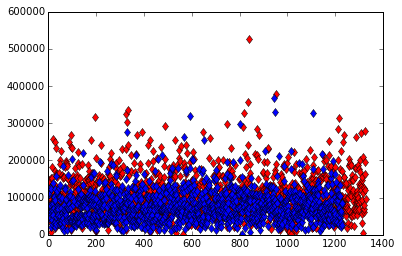

In [176]:
plt.plot(midatlantic['TOTALBTU'], 'rd')
plt.plot(wesouthcen['TOTALBTU'], 'bd')

The individual trends are similar and show an almost linear horizontal line.

'MIDATLANTIC' region is selected for carrying out further analysis and build a regression model for predicting energy consumption values.

(array([  7.,   4.,  13.,  14.,  18.,  17.,  18.,  22.,  35.,  36.,  41.,
         62.,  72.,  52.,  65.,  73.,  54.,  54.,  46.,  58.,  52.,  46.,
         52.,  31.,  34.,  28.,  29.,  24.,  34.,  30.,  23.,  20.,  11.,
         18.,  16.,  14.,  16.,  10.,  12.,   3.,   6.,   4.,   6.,   5.,
          6.,   5.,   1.,   3.,   5.,   1.,   4.,   2.,   2.,   2.,   1.,
          1.,   1.,   1.,   0.,   2.,   0.,   2.,   0.,   1.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([   3020.  ,    8263.35,   13506.7 ,   18750.05,   23993.4 ,
          29236.75,   34480.1 ,   39723.45,   44966.8 ,   50210.15,
          55453.5 ,   60696.85,   65940.2 ,   71183.55,   76426.9 ,
          81670.25,   86913.6 ,   92156.95,   97400.3 ,  102643.65,
         107887.  ,  113130.35,  118373.7 ,  1

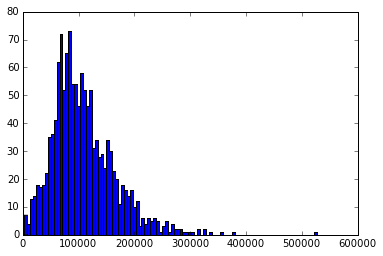

In [177]:
plt.hist(midatlantic['TOTALBTU'],bins=100)

Space heating energy consumption is analyzed against the dollar cost for space heating use to observe the correlation and check if it can be used for regression modeling. 

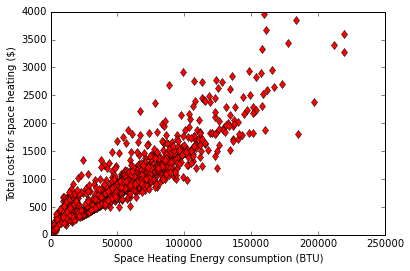

In [208]:
plt.plot(newdata['TOTALBTUSPH'],newdata['TOTALDOLSPH'], 'rd')
plt.xlabel('Space Heating Energy consumption (BTU)')
plt.ylabel('Total cost for space heating ($)')

## Plotting a linear least squares fit line.

The line is observed to see the trendline of the randomly distributed data.

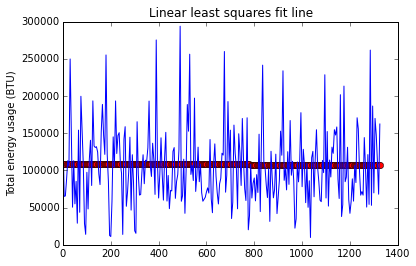

Average value of energy consumption (BTU):
104896.383459


In [209]:
xi = np.arange(0,1328)
A = np.array([ xi, np.ones(1328)])
# linearly generated sequence
y = midatlantic['TOTALBTU']

# obtaining the parameters
w = np.linalg.lstsq(A.T,y)[0] 

xa = np.arange(0,1328,5)
y = y[0:-1:5]

# plotting the regression line
line = w[0]*xa+w[1]
plt.plot(xa,line,'ro',xa,y)
plt.title('Linear least squares fit line')
plt.ylabel('Total energy usage (BTU)')
plt.show()

print "Average value of energy consumption (BTU):"
print np.average(y)

The least square fit line is observed to be almost horizontal suggesting uniform distribution of the data across the mean value of 104,896 BTU.

### Selection of highest correlated variables impacting total energy consumption.

Preliminarily, names and explanation of the variables are obtained by the 'public layout' file.

In [180]:
names = np.genfromtxt('public_layout.csv', delimiter=',',skip_header=1,dtype=None,usecols=[1])
print names

['Unique identifier for each respondent' 'Census Region' 'Census Division'
 'Reportable states and groups of states' 'Type of housing unit'
 'Final sample weight' '"Heating degree days in 2009'
 '"Cooling degree days in 2009' '"Heating degree days'
 '"Cooling degree days'
 'Building America Climate Region (collapsed for public file)'
 '"AIA Climate Zone'
 'Housing unit in Census Metropolitan Statistical Area or Micropolitan Statistical Area'
 'Housing unit classified as urban or rural by Census'
 '"Housing unit is owned' 'Housing unit part of condominium or cooperative'
 'Year housing unit was built' 'Year range when housing unit was built'
 'Year range when household moved in'
 'Converted 2-4 unit apartment building'
 'Converted 2-4 unit apartment building was originally a single-family house'
 'Converted 2-4 unit apartment building more like single family house or apartment building'
 'Number of floors in a 5+ unit apartment building'
 'Number of apartment units in a 5+ unit apartmen

#### Different variables are checked for their correlation value with the total energy consumption(TOTALBTU) based on manual understanding of the variables as shown below.

In [181]:
np.corrcoef(midatlantic['WINDOWS'],midatlantic['TOTALBTU'])[1,0]

0.48909065307980309

In [182]:
np.corrcoef(midatlantic['TOTSQFT_EN'],midatlantic['TOTALBTU'])[1,0]

0.53960276098516491

In [183]:
np.corrcoef(midatlantic['TEMPHOME'],midatlantic['TOTALBTU'])[1,0]

0.0038977065662747297

In [184]:
np.corrcoef(midatlantic['NWEIGHT'],midatlantic['TOTALBTU'])[1,0]

-0.091091633291037893

In [185]:
years = lambda d : ((dt.datetime.now()).year - d)
yearsold = np.array(list(map(years, midatlantic['YEARMADE'])))
midatlantic['YEARMADE']
print yearsold

[93 95 47 ..., 67 50 75]


In [186]:
np.corrcoef(midatlantic['YEARMADE'],midatlantic['TOTALBTU'])[1,0]

-0.027348298244598914

In [187]:
np.corrcoef(midatlantic['TOTROOMS'],midatlantic['TOTALBTU'])[1,0]

0.55248968425117162

In [188]:
np.corrcoef(midatlantic['NHSLDMEM'],midatlantic['TOTALBTU'])[1,0]

0.3098041035908895

In [189]:
np.corrcoef(midatlantic['MONEYPY'],midatlantic['TOTALBTU'])[1,0]

0.31068024918824672

In [190]:
np.corrcoef(midatlantic['STORIES'],midatlantic['TOTALBTU'])[1,0]

0.42837338142176584

In [191]:
np.corrcoef(midatlantic['WASHTEMP'],midatlantic['TOTALBTU'])[1,0]

0.34527156880018967

Result: The top factors based on the manual selection of variables are 'TOTSQFT_EN', 'TOTROOMS' and 'WINDOWS' with the correlation coefficient values ranging from 0.49 - 0.55.

#### This is further validated by running iteration using 'for' loop to obtain correlation coefficent values for all 931 variables. 

Variable with correlation values greater than 0.53: 
[[  3.00000000e+01   5.08608923e-01]
 [  3.40000000e+01   5.52489684e-01]
 [  4.61000000e+02   5.35652360e-01]
 [  6.09000000e+02   4.89090653e-01]
 [  8.27000000e+02   5.44864210e-01]
 [  8.28000000e+02   5.39602761e-01]
 [  8.29000000e+02   5.07334111e-01]
 [  8.44000000e+02   5.46642960e-01]
 [  8.50000000e+02   5.46642823e-01]
 [  8.56000000e+02   5.83235640e-01]
 [  8.57000000e+02   6.60729926e-01]
 [  8.58000000e+02   5.87121765e-01]
 [  8.59000000e+02   6.02139506e-01]
 [  8.61000000e+02   6.60729395e-01]
 [  8.62000000e+02   5.87121153e-01]
 [  8.63000000e+02   6.02138516e-01]
 [  8.65000000e+02   6.47689633e-01]
 [  8.66000000e+02   5.75068831e-01]
 [  8.67000000e+02   5.84890620e-01]
 [  9.07000000e+02   1.00000000e+00]
 [  9.08000000e+02   8.63002777e-01]
 [  9.10000000e+02   7.69465065e-01]
 [  9.12000000e+02   6.83688101e-01]
 [  9.13000000e+02   8.72608607e-01]
 [  9.14000000e+02   7.78108186e-01]
 [  9.16000000e+02   5

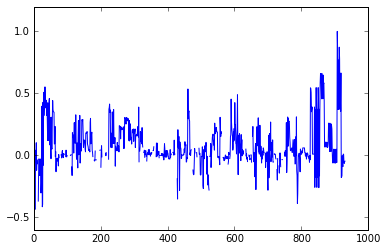

In [192]:
data1_ma = data1[(np.where(data1[:,2]==2))]

def bestcorrelation(X):
    vector = np.zeros((len(X.T), 2))
    
    for i in range(len(X.T)):        
            vector[i,0] = int(i)
            vector[i,1] = np.corrcoef(X[:,i],X[:,907])[1,0]                        
    return vector

v = bestcorrelation(data1_ma)
plt.plot(v[:,1])
highcorr = v[(np.where(v[:,1]>=0.47))]
print "Variable with correlation values greater than 0.53: "
print highcorr

## Multivariable regression modeling for midatlantic residential energy consumption

The top predictor variables are plotted against total the energy consumption values to visualize the trend.

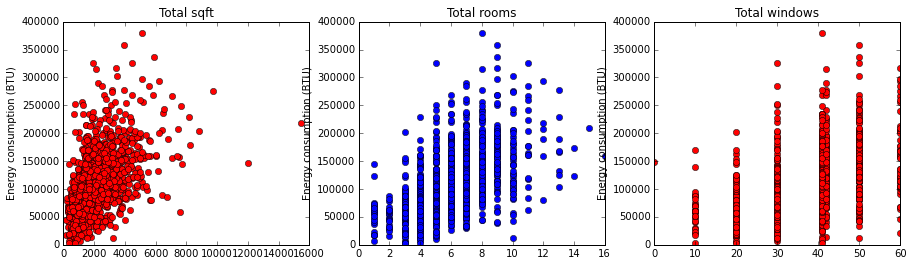

In [193]:
fig = plt.figure(1)
fig.set_size_inches(15, 4)

ax1 = fig.add_subplot(1,3,1)
ax1.plot((data[:,0]),(data[:,3]),'ro')
ax1.set_title("Total sqft")
ax1.set_ylabel("Energy consumption (BTU)")

ax2 = fig.add_subplot(1,3,2)
ax2.plot((data[:,1]),(data[:,3]),'bo')
ax2.set_title("Total rooms")
ax2.set_ylabel("Energy consumption (BTU)")

ax3 = fig.add_subplot(1,3,3)
ax3.plot((data[:,2]),(data[:,3]),'ro')
ax3.set_title("Total windows")

ax3.set_ylabel("Energy consumption (BTU)")

plt.show()

#### Base function for making designmatrix, beta_hat and R2 coefficents are defined for multi-variable regression modeling.

In [194]:
def designmatrix(var1, var2, var3):
    designmatrix = np.vstack((var1, var2, var3))
    designmatrix = designmatrix.T
    return designmatrix

def beta_hat(X,Y):
    dotp = np.dot(X.T,X)
    Ainv = np.linalg.inv(dotp)
    final = np.dot(Ainv,X.T)
    final = np.dot(final,Y)    
    return final

def R2(X,Y,beta_hat):
    m2 = Y-np.dot(X,beta_hat)
    m1 = m2.T
    y_avg =np.mean(Y)
    n2 = Y - y_avg
    n1 = n2.T
    R2_value = 1 - ((np.dot(m1,m2))/(np.dot(n1,n2)))
    return R2_value

#### To remove the outliers, 'k' is defined as the cutoff above which the data will be trimmed. A 'for' loop is run below to optimize the 'k' value to obtain the maximum value of the R2 coefficient.

Maximum value of R2:  0.381068454214
At k value (k_max):  310000


(663,)

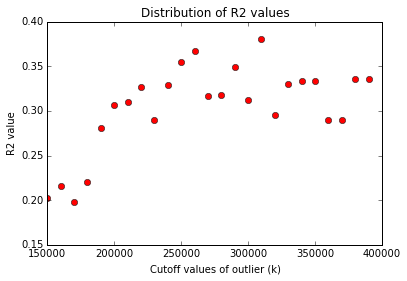

In [195]:
R2_max = 0

for k in range(150000,400000,10000):

    newdata = midatlantic[np.where(midatlantic['TOTALBTU']<k)]
    data = newdata['TOTSQFT_EN'],newdata['TOTROOMS'],newdata['WINDOWS'],newdata['TOTALBTU']
    data = np.transpose(data)
    
    data_sorted  = sorted(data, key=itemgetter(1))

    #Divide
    data = data[0:-1]
    data_train = data[::2]
    data_test = data[1::2]
    
    #Train dataset
    area_train = data_train[:,0]
    rooms_train = data_train[:,1]
    windows_train = data_train[:,2]
    btu_train = data_train[:,3]
    
    dmx1 = designmatrix(area_train,rooms_train,windows_train)
    beta_hat1 = beta_hat(dmx1,btu_train)
    
    #Test dataset
    area_test = data_test[:,0]
    rooms_test = data_test[:,1]
    windows_test = data_test[:,2]
    btu_test = data_test[:,3]
    
    dmx2 = designmatrix(area_test,rooms_test,windows_test)
    btu_pre = np.dot(dmx2,beta_hat1)
    
    R2_val = R2(dmx2,btu_test,beta_hat1)
    plt.plot(k,R2_val,'ro')
    plt.title('Distribution of R2 values')
    plt.xlabel('Cutoff values of outlier (k)')
    plt.ylabel('R2 value')
    
    if R2_max < R2_val:
        R2_max = R2_val
        k_max = k
    else: 
        R2_max = R2_max
        k_max = k_max
            
print "Maximum value of R2: ",R2_max
print "At k value (k_max): ",k_max
btu_test.shape

#### Using the results from above, the final dataset is created after removing the outliers having a value below k_max

In [196]:
newdata = midatlantic[np.where(midatlantic['TOTALBTU']<k_max)]
data = newdata['TOTSQFT_EN'],newdata['TOTROOMS'],newdata['WINDOWS'],newdata['TOTALBTU']
data = np.transpose(data)

#### Split the final dataset into train and test data

In [197]:
# Data is sorted on number of total rooms
data_sorted  = sorted(data, key=itemgetter(1))
 
# Divide alternative values are taken henceforth for train and test dataset
data_sorted = np.array(data_sorted[0:-1])
data_train1 = np.array(data_sorted[::2])
data_test1 = np.array(data_sorted[1::2])
data_sorted

array([[  1188,      1,     41,  65043],
       [   517,      1,     30,  36952],
       [   313,      1,     10,  60251],
       ..., 
       [  5047,     14,     60, 122480],
       [  2043,     14,     50, 174227],
       [  2748,     15,     60, 210048]])

## Validation:

**'Validation' function** is created to build the model and make predictions for the energy consumption of test dataset. 

It takes train dataset and test dataset as input and returns the R2 value and beta_matrix as output. 
It gives a plot to observe the comparison between actual and predicted values.

R2 value is:  0.400553308137
Beta matrix: [    6.40646137  6271.21455636  1476.27906611]


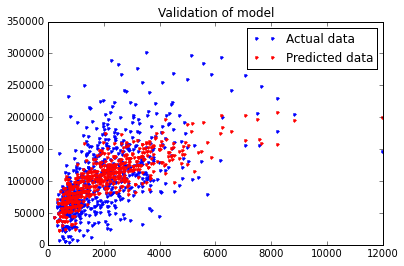

In [198]:
def validation(data_train,data_test):

    #Train dataset
    btu_train = data_train[:,3]

    dmx1 = designmatrix(data_train[:,0],data_train[:,1],data_train[:,2])
    
    beta_hat1 = beta_hat(dmx1,btu_train)

    #Test dataset
    btu_test = data_test[:,3]
    
    dmx2 = designmatrix(data_test[:,0],data_test[:,1],data_test[:,2])
    
    btu_pre = np.dot(dmx2,beta_hat1)

    R2_val = R2(dmx2,btu_test,beta_hat1)  
    
    print "R2 value is: ",R2_val
    
    plt.plot(data_test[:,0],btu_test,'.b')
    plt.plot(data_test[:,0],btu_pre,'.r')
    plt.legend(['Actual data','Predicted data'])
    plt.title('Validation of model')
    print "Beta matrix:",beta_hat1
    return (beta_hat1, R2_val)


beta1, R2_1 = validation(data_train1,data_test1)

#### Mean of one variable is compared for both test and train dataset to check for significant difference between them. 

In [199]:
print np.mean(data_test[:,0])
print np.mean(data_train[:,0])

2053.98039216
2096.43137255


In [200]:
print np.mean(data_test[:,1])
print np.mean(data_train[:,1])

5.84464555053
5.8838612368


## Cross-validation:

The data has been split into three equal parts by selecting every third value for a dataset starting at different points.

In [201]:
print data_sorted
first = np.array(data_sorted[::3])
second = np.array(data_sorted[1::3])
third = np.array(data_sorted[2::3])

print "First dataset[0]:",first[0]
print "Second dataset[0]:",second[0]
print "Third dataset[0]:",third[0]

[[  1188      1     41  65043]
 [   517      1     30  36952]
 [   313      1     10  60251]
 ..., 
 [  5047     14     60 122480]
 [  2043     14     50 174227]
 [  2748     15     60 210048]]
First dataset[0]: [ 1188     1    41 65043]
Second dataset[0]: [  517     1    30 36952]
Third dataset[0]: [  313     1    10 60251]


Three pairs of train and test datasets are created for cross validation purpose using the three datasets.

In [202]:
data_train2 = np.vstack((first,second))
data_test2 = np.array(third)
print "Second split of datasets"
print data_train2.shape
print data_test2.shape

data_train3 = np.vstack((first,third))
data_test3 = np.array(second)
print "Third split of datasets"
print data_train3.shape
print data_test3.shape

data_train4 = np.vstack((third,second))
data_test4 = np.array(first)
print "Fourth split of datasets"
print data_train4.shape
print data_test4.shape

Second split of datasets
(880, 4)
(439, 4)
Third split of datasets
(879, 4)
(440, 4)
Fourth split of datasets
(879, 4)
(440, 4)


R2 value is:  0.317785760003
Beta matrix: [    9.83361476  7469.64165002  1149.43064098]


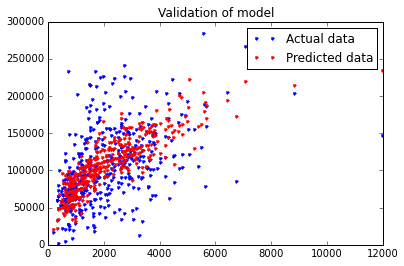

In [203]:
beta2, R2_2 = validation(data_train2,data_test2)

R2 value is:  0.398525487668
Beta matrix: [  6.75388342e+00   7.34240501e+03   1.29650931e+03]


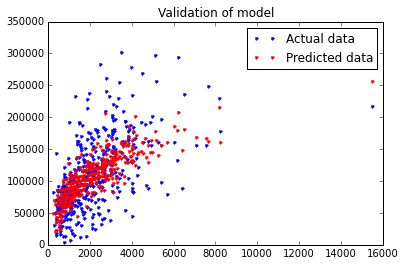

In [204]:
beta3, R2_3 = validation(data_train3,data_test3)

R2 value is:  0.353451435755
Beta matrix: [    7.62732665  7409.65065618  1264.0514207 ]


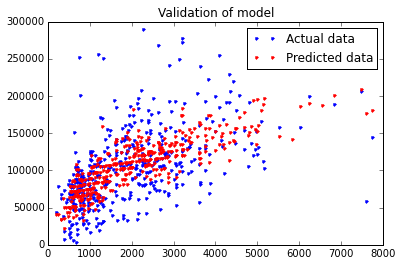

In [205]:
beta4, R2_4 = validation(data_train4,data_test4)

#### Final Result: Mean values of R2 and Beta_hat matrices

In [206]:
l = [R2_1,R2_2,R2_3,R2_4]
R2_avg = np.mean(l)
print "Mean R2 value: ",R2_avg

beta_avg = np.mean([beta1,beta2,beta3,beta4],axis=0)
print "Mean Beta_hat matrix: ",beta_avg 

Mean R2 value:  0.367578997891
Mean Beta_hat matrix:  [    7.65532155  7123.22796853  1296.56760891]


#### Calculate uncertainties using 95% confidence intervals corresponding to t-distribution

This is calculated using the first train dataset created and the average beta_hat matrix.

In [207]:
# calculating error matrix: (Y-XB)
btu_test = data_test1[:,3]
dmx2 = designmatrix(data_test1[:,0],data_test1[:,1],data_test1[:,2])

error = btu_test - np.dot(dmx2,beta_avg)
# defining N for the number of data points in the test dataset
N = error.size
# defining the number of co-efficients in the beta_hat matrix
p = beta_avg.size
X = dmx2
print "N=",N
print "p=",p

#squaring of error matrix is calculated by multiplying by its transpose
errormatrix = (np.dot(error,error.T))/(N-p-1)
# print "Standard mean error:",errormatrix

s_var = errormatrix*(np.linalg.inv(np.dot(X.T,X)))
# print s_var

import math
sqrt = lambda d: (math.sqrt(d))
s_dev = map(sqrt,np.diag(s_var))
# s_dev

from scipy.stats import t
T_val = t.isf((1-0.95)/2,(N-p-1))

max_val = beta_avg + np.dot(T_val,s_dev)
min_val = beta_avg - np.dot(T_val,s_dev)
print "Base value: "+str(np.round(beta_avg, decimals=1))
print "Maximum value: "+str(np.round(max_val, decimals=1))
print "Minimum value: "+str(np.round(min_val, decimals=1))

N= 659
p= 3
Base value: [    7.7  7123.2  1296.6]
Maximum value: [   10.7  9344.1  1632.4]
Minimum value: [  4.70000000e+00   4.90230000e+03   9.60800000e+02]
